# C2W4: Multi-class Classification

* https-deeplearning-ai/**tensorflow-1-public**/C2/W4/assignment/[C2W4_Assignment.ipynb](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C2/W4/assignment/C2W4_Assignment.ipynb)
* Commit `d79901f` on Feb 23, 2023 - [Compare](https://github.com/https-deeplearning-ai/tensorflow-1-public/compare/d79901f..)

Sign Language MNIST
* 28x28 images
* 26 letters

In [1]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [ ]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

In [2]:
TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

In [3]:
with open(TRAINING_FILE) as training_file:
    line = training_file.readline()
    print(f"First line (header) looks like this:\n{line}")
    line = training_file.readline()
    print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

## Parsing the dataset

In [4]:
def parse_data_from_input(filename):

    with open(filename) as file: 
        csv_reader = csv.reader(file, delimiter=',')
        next(csv_reader)
        
        images = []
        labels = []

        for row in csv_reader:
            images.append([int(num) for num in row[1:]])
            labels.append(int(row[0]))
        
        labels = np.array(labels, dtype=np.uint8)
        images = np.array(images, dtype=np.uint8).reshape((-1, 28, 28))

        return images, labels

In [5]:
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: uint8
Training labels has shape: (27455,) and dtype: uint8
Validation images has shape: (7172, 28, 28) and dtype: uint8
Validation labels has shape: (7172,) and dtype: uint8


## Visualizing the numpy arrays

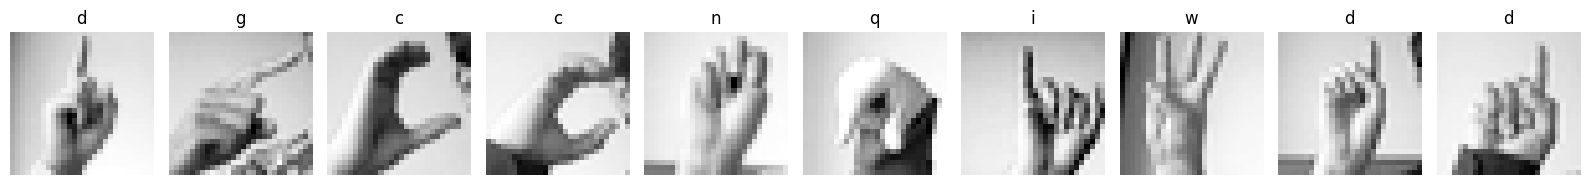

In [6]:
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(1, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

## Creating the generators for the CNN

In [7]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):

    training_images = np.expand_dims(training_images, -1)
    validation_images = np.expand_dims(validation_images, -1)

    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow(x=training_images,
                                         y=training_labels,
                                         batch_size=32) 

    validation_datagen = ImageDataGenerator(rescale=1/255)

    validation_generator = validation_datagen.flow(x=validation_images,
                                                   y=validation_labels,
                                                   batch_size=32) 

    return train_generator, validation_generator

In [8]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


## Coding the CNN

In [27]:
def create_model():

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')])
    

    model.compile(optimizer = 'rmsprop',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

In [28]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/9
858/858 [==============================] - 13s 14ms/step - loss: 0.7530 - accuracy: 0.7693 - val_loss: 0.3589 - val_accuracy: 0.8882
Epoch 2/9
858/858 [==============================] - 12s 14ms/step - loss: 0.0918 - accuracy: 0.9693 - val_loss: 0.2649 - val_accuracy: 0.9247
Epoch 3/9
858/858 [==============================] - 12s 14ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.2610 - val_accuracy: 0.9357
Epoch 4/9
858/858 [==============================] - 12s 14ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.2722 - val_accuracy: 0.9339
Epoch 5/9
858/858 [==============================] - 13s 15ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.2597 - val_accuracy: 0.9406
Epoch 6/9
858/858 [==============================] - 12s 14ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.2653 - val_accuracy: 0.9448
Epoch 7/9
858/858 [==============================] - 12s 14ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.2756 - val_accuracy: 0.9405

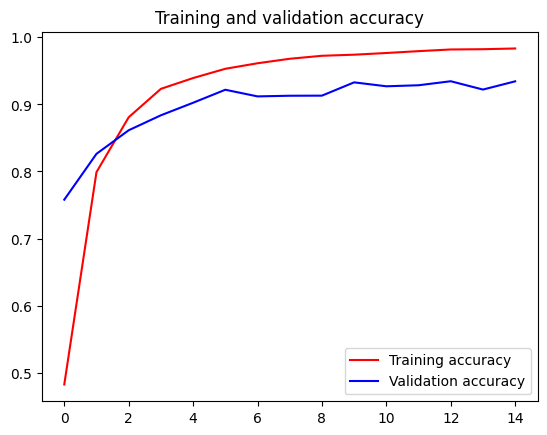

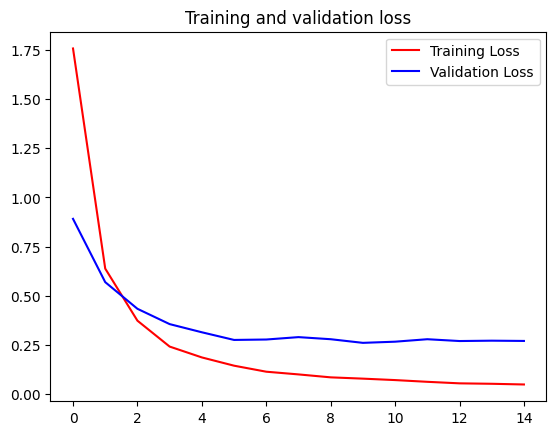

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()